In [1]:
import numpy as np # A package for scientific computing in Python, providing support for arrays and matrices, as well as a wide range of mathematical operations
import pandas as pd # A library for data manipulation and analysis, providing data structures like DataFrames and Series to work with tabular data.
import seaborn as sns # A data visualization library based on Matplotlib that provides a high-level interface for creating informative and attractive statistical graphics.
import matplotlib.pyplot as plt # A plotting library for creating static, interactive, and animated visualizations in Python.
import plotly.graph_objects as go # A package for creating interactive and dynamic visualizations in Python, including graphs, charts, and maps.
# import scikitplot as sklpt
import kaleido # A package for exporting static images of visualizations created with Plotly or Matplotlib.
import warnings # A library for handling warnings and exceptions in Python.
warnings.filterwarnings("ignore")


from IPython.display import display # A module that provides functions for displaying various types of data within the IPython environment.
from matplotlib import colormaps # A module that provides a collection of color maps for use in visualizations.
from plotly.subplots import make_subplots

# scipy: A library for scientific computing and statistics in Python, including tools for optimization, integration, interpolation, and more.
import scipy.stats as sts
from scipy.stats import spearmanr, chi2_contingency
from scipy.stats import normaltest, ttest_ind
from scipy.stats import shapiro

# sklearn: A package that provides a wide range of machine learning algorithms and tools for data preprocessing, model selection, evaluation, and more.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from itertools import combinations

In [2]:
data = pd.read_csv("../stroke_dataset/healthcare-dataset-stroke-data.csv", index_col=0 #sets the first column of the CSV file as the index of the dataframe 
                   , dtype = {
        'id' : int,
        'gender' : 'category', # pd.CategoricalDtype(categories=["Male", "Female"], ordered=False),
        'age' : float,
        'hypertension' : bool,
        'heart_disease' : bool,
        'ever_married' : 'category',
        'work_type' : 'category', # pd.CategoricalDtype(categories=["Private", "Self-employed", "Govt_job"], ordered=False),
        'Residence_type' : 'category', # pd.CategoricalDtype(categories=["Urban", "Rural"], ordered=False),
        'avg_glucose_level' : float,
        'bmi' : float,
        'smoking_status' : 'category', # pd.CategoricalDtype(categories=["never smoked", "smokes", "formerly smoked", "Unknown"], ordered=False),
        'stroke' : bool
    },
)


In [3]:
#data = pd.read_csv("../stroke_dataset/healthcare-dataset-stroke-data.csv", index_col=0 #sets the first column of the CSV file as the index of the dataframe
#                   )

Tutorial 2

In [4]:
print(data.dtypes)
print("-------------------------")
print('shape:', data.shape)
print("-------------------------")
print(data.head(10))
print("-------------------------")
print('missing values: ', data.isna().sum())
print("-------------------------")
print(data.describe())
print("-------------------------")
# print('data types: ', data.dtypes)


gender               category
age                   float64
hypertension             bool
heart_disease            bool
ever_married         category
work_type            category
Residence_type       category
avg_glucose_level     float64
bmi                   float64
smoking_status       category
stroke                   bool
dtype: object
-------------------------
shape: (5110, 11)
-------------------------
       gender   age  hypertension  heart_disease ever_married      work_type  \
id                                                                             
9046     Male  67.0         False           True          Yes        Private   
51676  Female  61.0         False          False          Yes  Self-employed   
31112    Male  80.0         False           True          Yes        Private   
60182  Female  49.0         False          False          Yes        Private   
1665   Female  79.0          True          False          Yes  Self-employed   
56669    Male  81.0       

In [5]:
#unique values as overview
category_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']

for column in category_columns:
    unique_categories = data[column].unique()
    print(f"Unique categories in {column}: {unique_categories}")

Unique categories in gender: ['Male', 'Female', 'Other']
Categories (3, object): ['Female', 'Male', 'Other']
Unique categories in hypertension: [False  True]
Unique categories in heart_disease: [ True False]
Unique categories in ever_married: ['Yes', 'No']
Categories (2, object): ['No', 'Yes']
Unique categories in work_type: ['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked']
Categories (5, object): ['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children']
Unique categories in Residence_type: ['Urban', 'Rural']
Categories (2, object): ['Rural', 'Urban']
Unique categories in smoking_status: ['formerly smoked', 'never smoked', 'smokes', 'Unknown']
Categories (4, object): ['Unknown', 'formerly smoked', 'never smoked', 'smokes']
Unique categories in stroke: [ True False]


In [6]:

# gender
print(data['gender'].value_counts())
print('------------------')

# age
print('min age: ', data['age'].min())
print('max age: ', data['age'].max())
print('mean age: ', data['age'].mean())
print('median age: ', data['age'].median())
print('------------------')

# hypertension
print(data['hypertension'].value_counts())
print('------------------')

# heart_disease
print(data['heart_disease'].value_counts())
print('------------------')

# ever_married
print(data['ever_married'].value_counts())
print('------------------')

# work_type
print(data['work_type'].value_counts())
print('------------------')

# Residence_type
print(data['Residence_type'].value_counts())
print('------------------')

# avg_glucose_level
print('min avg_glucose_level: ', data['avg_glucose_level'].min())
print('max avg_glucose_level: ', data['avg_glucose_level'].max())
print('mean avg_glucose_level: ', data['avg_glucose_level'].mean())
print('median avg_glucose_level: ', data['avg_glucose_level'].median())
print('------------------')

# bmi
print('min bmi: ', data['bmi'].min())
print('max bmi: ', data['bmi'].max())
print('mean bmi: ', data['bmi'].mean())
print('median bmi: ', data['bmi'].median())
print('------------------')

# smoking_status
print(data['smoking_status'].value_counts())
print('------------------')

# stroke 
print(data['stroke'].value_counts())
print('------------------')

# Use pairplot to visualize the relationships between variables
# sns.pairplot(data, hue='stroke') bringt nüt wüu mir wei immer relationship with stroke

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
------------------
min age:  0.08
max age:  82.0
mean age:  43.226614481409
median age:  45.0
------------------
False    4612
True      498
Name: hypertension, dtype: int64
------------------
False    4834
True      276
Name: heart_disease, dtype: int64
------------------
Yes    3353
No     1757
Name: ever_married, dtype: int64
------------------
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
------------------
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
------------------
min avg_glucose_level:  55.12
max avg_glucose_level:  271.74
mean avg_glucose_level:  106.1476771037182
median avg_glucose_level:  91.88499999999999
------------------
min bmi:  10.3
max bmi:  97.6
mean bmi:  28.893236911794666
median bmi:  28.1
------------------
never smoked       1892
Unknown            1544
formerly smoked     885


Tutorial 3

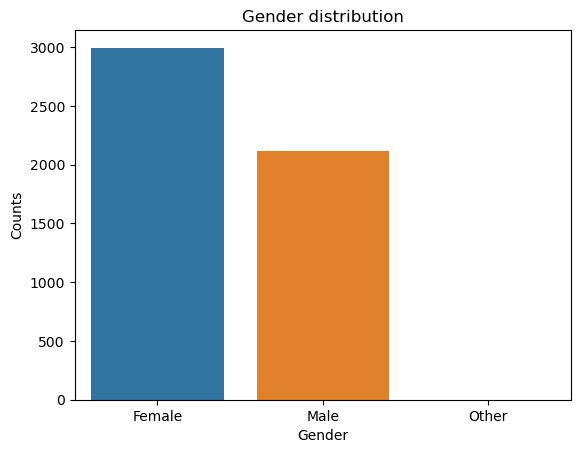

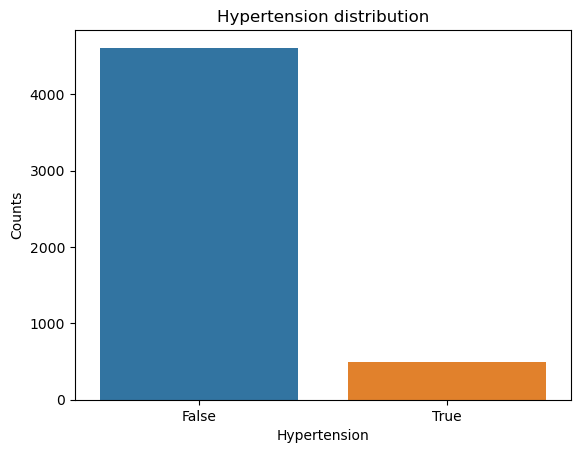

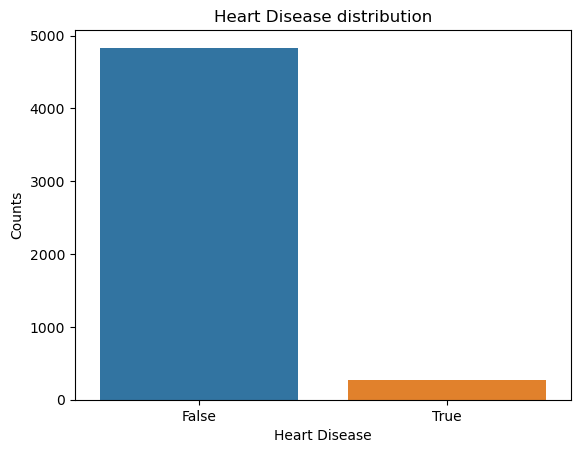

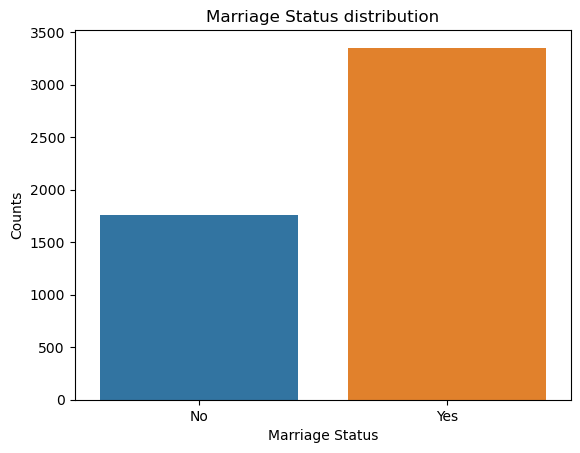

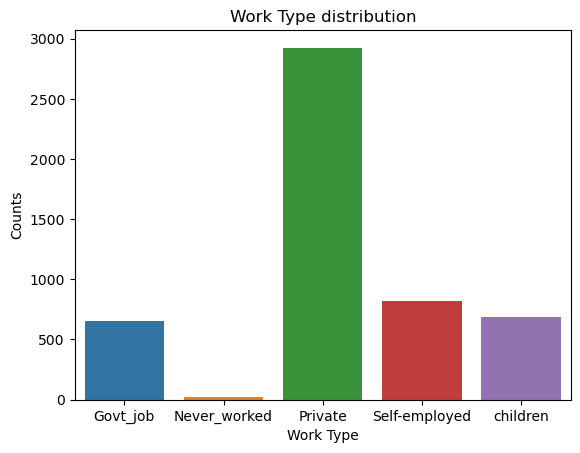

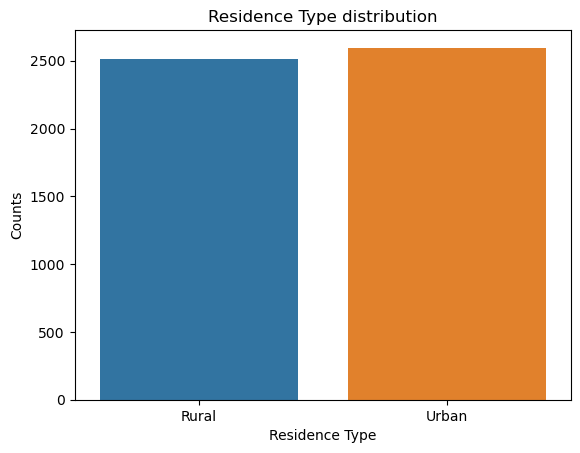

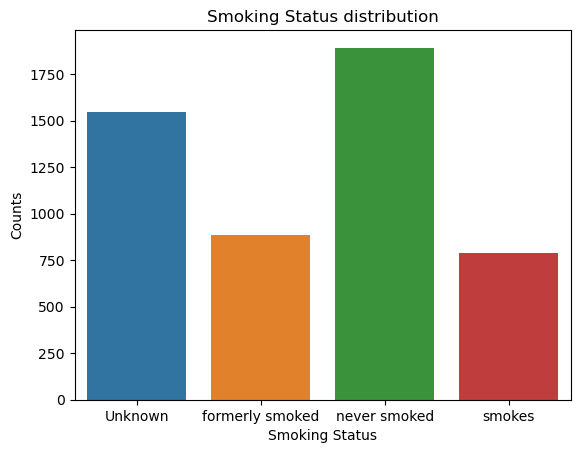

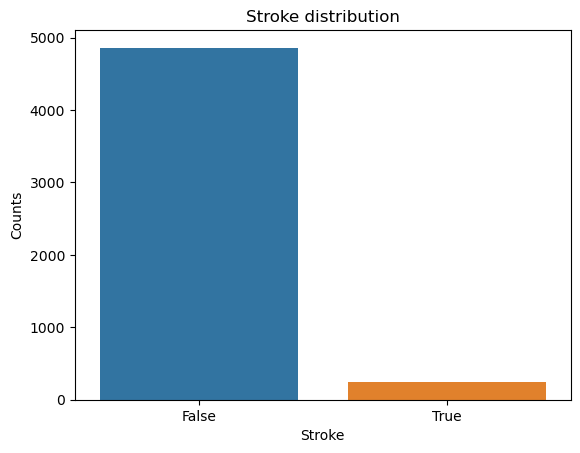

In [7]:
# Subplot for all the distributions
#fig_distributions = plt.subplot(4, 2, figsize = (12, 12))
plt.show()

# gender
fig_gender = sns.countplot(data, x = 'gender')
fig_gender.set(xlabel = 'Gender', ylabel = 'Counts', title = 'Gender distribution')
plt.show()

# hypertension
fig_hypertension = sns.countplot(data, x = 'hypertension')
fig_hypertension.set(xlabel = 'Hypertension', ylabel = 'Counts', title = 'Hypertension distribution')
plt.show()

# heart_disease
fig_heart_disease = sns.countplot(data, x = 'heart_disease')
fig_heart_disease.set(xlabel = 'Heart Disease', ylabel = 'Counts', title = 'Heart Disease distribution')
plt.show()

# ever_married
fig_ever_married = sns.countplot(data, x = 'ever_married')
fig_ever_married.set(xlabel = 'Marriage Status', ylabel = 'Counts', title = 'Marriage Status distribution')
plt.show()

# work_type
fig_work_type = sns.countplot(data, x = 'work_type')
fig_work_type.set(xlabel = 'Work Type', ylabel = 'Counts', title = 'Work Type distribution')
plt.show()

# Residence_type
fig_Residence_type = sns.countplot(data, x = 'Residence_type')
fig_Residence_type.set(xlabel = 'Residence Type', ylabel = 'Counts', title = 'Residence Type distribution')
plt.show()

# smoking_status
fig_smoking_status = sns.countplot(data, x = 'smoking_status')
fig_smoking_status.set(xlabel = 'Smoking Status', ylabel = 'Counts', title = 'Smoking Status distribution')
plt.show()

# stroke
fig_stroke = sns.countplot(data, x = 'stroke')
fig_stroke.set(xlabel = 'Stroke', ylabel = 'Counts', title = 'Stroke distribution')
plt.show()


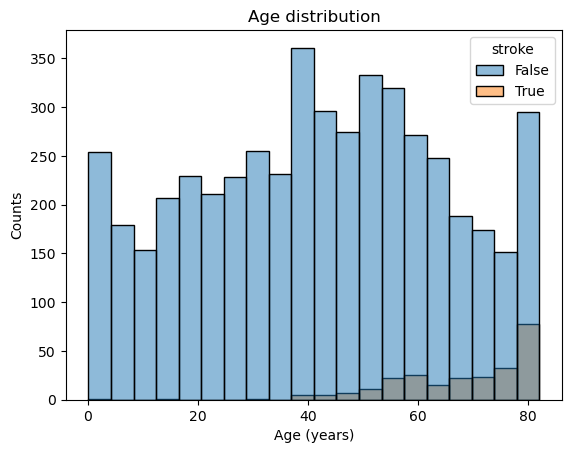

[Text(0.5, 0, 'Stroke'),
 Text(0, 0.5, 'Age (years)'),
 Text(0.5, 1.0, 'Age split by Stroke')]

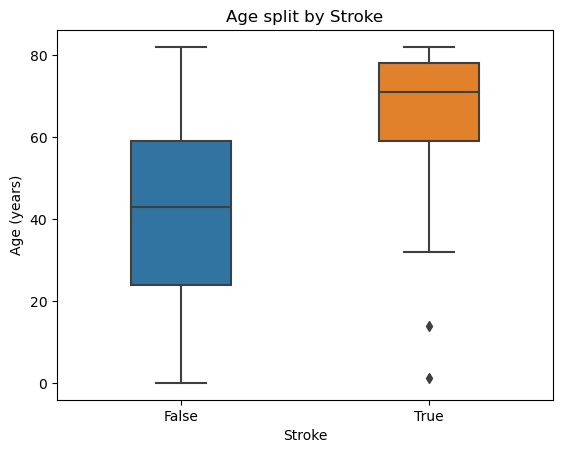

In [8]:
# age
fig_age= sns.histplot(data, x = 'age', hue = 'stroke')
fig_age.set(xlabel = 'Age (years)', ylabel = 'Counts', title = 'Age distribution')
plt.show()

fig_age_stroke = sns.boxplot(data, x = 'stroke', y ='age',width=0.4)
fig_age_stroke.set(xlabel = 'Stroke', ylabel = 'Age (years)', title = 'Age split by Stroke')



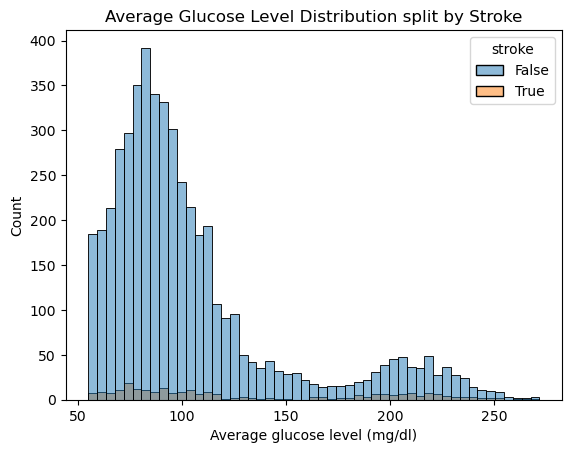

[Text(0.5, 0, 'Stroke'),
 Text(0, 0.5, 'Average glucose level (mg/dl)'),
 Text(0.5, 1.0, 'Average Glucose Level split by Stroke')]

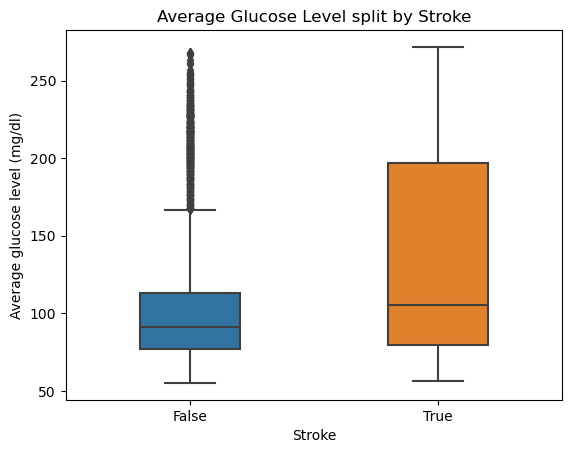

In [9]:
# avg_glucose_level
fig_avg_glucose_level = sns.histplot(data, x = 'avg_glucose_level', hue = 'stroke')
fig_avg_glucose_level.set(xlabel = 'Average glucose level (mg/dl)', ylabel = 'Count', title = 'Average Glucose Level Distribution split by Stroke')
plt.show()

fig_avg_glucose_level = sns.boxplot(data, x = 'stroke', y ='avg_glucose_level',width=0.4)
fig_avg_glucose_level.set(xlabel = 'Stroke', ylabel = 'Average glucose level (mg/dl)', title = 'Average Glucose Level split by Stroke')


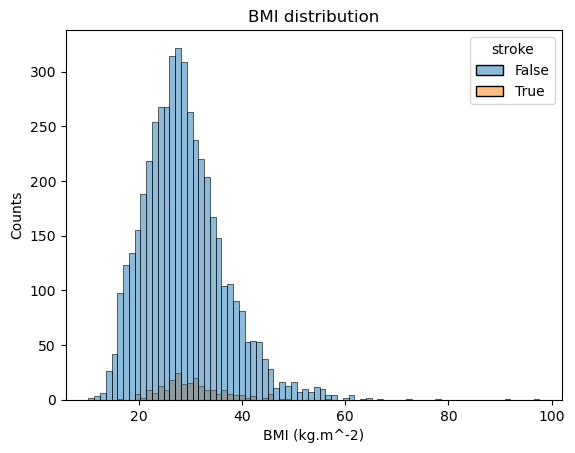

[Text(0.5, 0, 'Stroke'),
 Text(0, 0.5, 'BMI (kg.m^-2)'),
 Text(0.5, 1.0, 'BMI split by Stroke')]

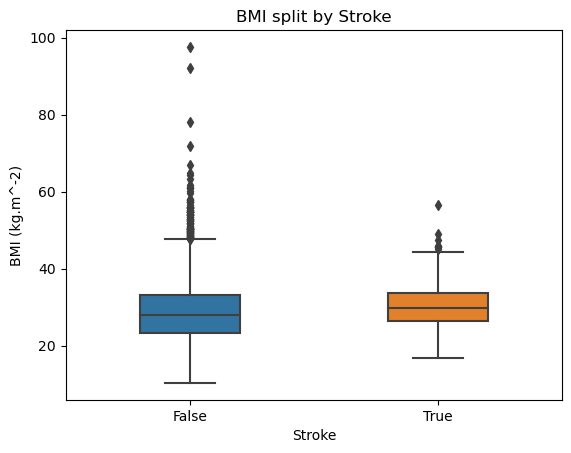

In [10]:
# bmi
fig_bmi = sns.histplot(data, x = 'bmi', hue = 'stroke')
fig_bmi.set(xlabel = 'BMI (kg.m^-2)', ylabel = 'Counts', title = 'BMI distribution')
plt.show()

fig_bmi_stroke = sns.boxplot(data, x = 'stroke', y ='bmi',width=0.4)
fig_bmi_stroke.set(xlabel = 'Stroke', ylabel = 'BMI (kg.m^-2)', title = 'BMI split by Stroke')


Tutorial 4 & 5

In [11]:
#Datenbereinigung!

In [12]:
#how many strokes
print(data["stroke"].value_counts())
print("-------------------------")
#imbalanced!-> challenges for certain machine learning algorithms, 
#as the model may be biased towards the majority class and struggle to learn patterns from the minority class.

False    4861
True      249
Name: stroke, dtype: int64
-------------------------


In [13]:
#data types conversion-> already done in beginning

In [14]:
#outlier in categorical data

#gender distribution has only one in the category other so we can delete this category
print(data.shape)
other_count = data['gender'].value_counts()['Other']
print("Count of 'Other' in the 'gender' column:", other_count)
other_indices = data[data['gender'] == 'Other'].index.tolist()
print("Indices where 'Other' occurs in the 'gender' column:", other_indices)
data = data.drop(other_indices, axis=0)
print('----------------------')
print(data.shape)


(5110, 11)
Count of 'Other' in the 'gender' column: 1
Indices where 'Other' occurs in the 'gender' column: [56156]
----------------------
(5109, 11)


In [15]:
#delete rows with missing data-> BMI
#too much to just put in mean
#alternative: mean or regression imputation, k-nearest neighbour
print(data.shape)
data.dropna(axis='index', subset=['bmi'], inplace=True)
print(data.shape)
#data.isna().sum()
#axis='index' -> rows containing missing values in the specified subset should be dropped
#inplace=True-> changes are made directly to the data DataFrame.

(5109, 11)
(4908, 11)


In [16]:
#remove outliers in continuous data-> analyzing boxplots-> not only impossible values but also max/mins because not representative for population

#bmi: highest measured are around 200 so 100 could be
print(data.shape)
print('----------------------')
filtered_data_bmi_f = data[(data['stroke'] == False) & (data['bmi'] >70)]
#print(filtered_data_bmi_f)
filtered_ids_bmi_f = filtered_data_bmi_f.index.tolist()
print("IDs that satisfy the bmi criteria without stroke:", filtered_ids_bmi_f)
data = data.drop(filtered_ids_bmi_f, axis=0)
print('----------------------')
print(data.shape)

filtered_data_bmi_t = data[(data['stroke'] == True) & (data['bmi'] >50)]
#print(filtered_data_bmi_t)
filtered_ids_bmi_t = filtered_data_bmi_t.index.tolist()
print("IDs that satisfy the bmi criteria with stroke:", filtered_ids_bmi_t)
data = data.drop(filtered_ids_bmi_t, axis=0)
print('----------------------')

#avg_glucose_level-> looks right/positive skewed, continuous values to the right-> no outliers detectable

#age: 2 outliers in the group stroke = True
print(data.shape)
print('----------------------')
filtered_data_age = data[(data['stroke'] == True) & (data['age'] < 30)]
#print(filtered_data_age)
#print('----------------------')
#num_ids = len(filtered_data)
#print(f"Number of IDs: {num_ids}")
#print('----------------------')
filtered_ids_age = filtered_data_age.index.tolist()
print("IDs that satisfy the age criteria:", filtered_ids_age)
data = data.drop(filtered_ids_age, axis=0)
print(data.shape)

(4908, 11)
----------------------
IDs that satisfy the bmi criteria without stroke: [545, 41097, 56420, 51856]
----------------------
(4904, 11)
IDs that satisfy the bmi criteria with stroke: [41069]
----------------------
(4903, 11)
----------------------
IDs that satisfy the age criteria: [49669]
(4902, 11)


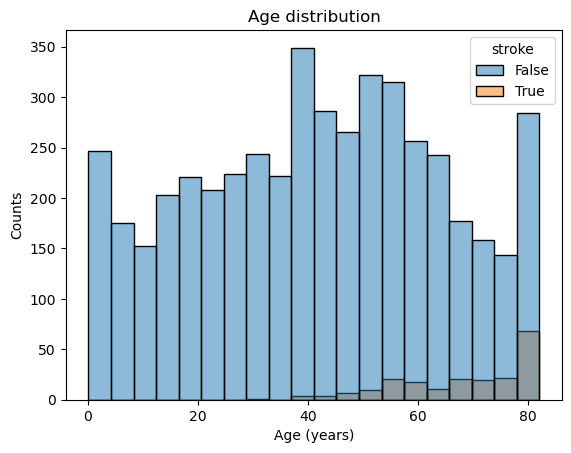

[Text(0.5, 0, 'Stroke'),
 Text(0, 0.5, 'Age (years)'),
 Text(0.5, 1.0, 'Age split by Stroke')]

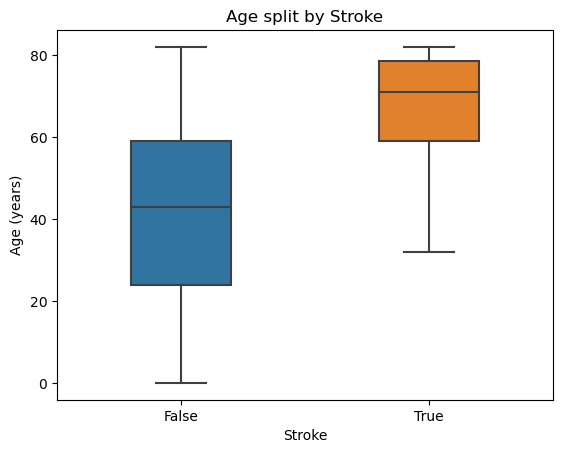

In [17]:
#do the bar plot again to see if outliers are gone
# age
fig_age= sns.histplot(data, x = 'age', hue = 'stroke')
fig_age.set(xlabel = 'Age (years)', ylabel = 'Counts', title = 'Age distribution')
plt.show()

fig_age_stroke = sns.boxplot(data, x = 'stroke', y ='age',width=0.4)
fig_age_stroke.set(xlabel = 'Stroke', ylabel = 'Age (years)', title = 'Age split by Stroke')

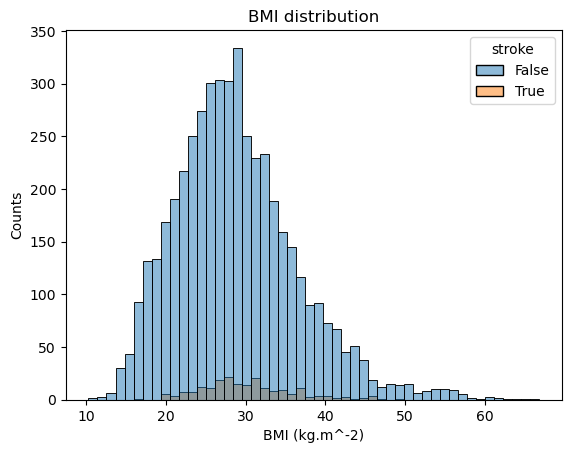

[Text(0.5, 0, 'Stroke'),
 Text(0, 0.5, 'BMI (kg.m^-2)'),
 Text(0.5, 1.0, 'BMI split by Stroke')]

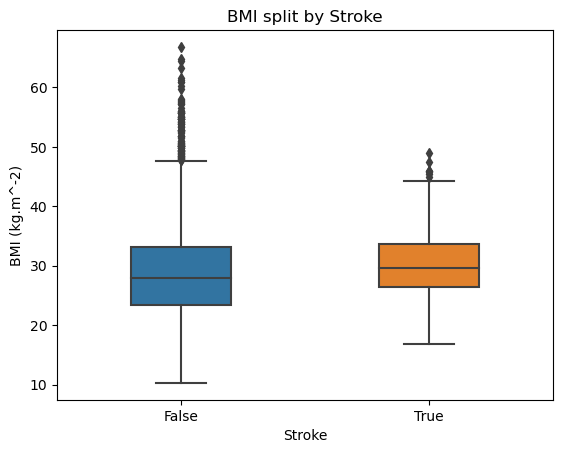

In [18]:
# bmi
#do the bar plot again to see if outliers are gone
fig_bmi = sns.histplot(data, x = 'bmi', hue = 'stroke')
fig_bmi.set(xlabel = 'BMI (kg.m^-2)', ylabel = 'Counts', title = 'BMI distribution')
plt.show()

fig_bmi_stroke = sns.boxplot(data, x = 'stroke', y ='bmi',width=0.4)
fig_bmi_stroke.set(xlabel = 'Stroke', ylabel = 'BMI (kg.m^-2)', title = 'BMI split by Stroke')


In [20]:
#Check if continuous variables are normally distributed
#looking at the hisplots in Tutorial 3
#Perform Shapiro-Wilk test for normality
#P value larger than 0.05 -> normal distribution is assumed!  
columns = data.select_dtypes(include=[np.number]).columns
for var in columns:
    result = sts.shapiro(data[var].dropna())
    print(f"Shapiro-Wilk for {var}, p-value: {result.pvalue:.10f}")
#they are all NOT normally distributed-> take that into account later with alternative statistical techniques or distributions

Shapiro-Wilk for age, p-value: 0.0000000000
Shapiro-Wilk for avg_glucose_level, p-value: 0.0000000000
Shapiro-Wilk for bmi, p-value: 0.0000000000


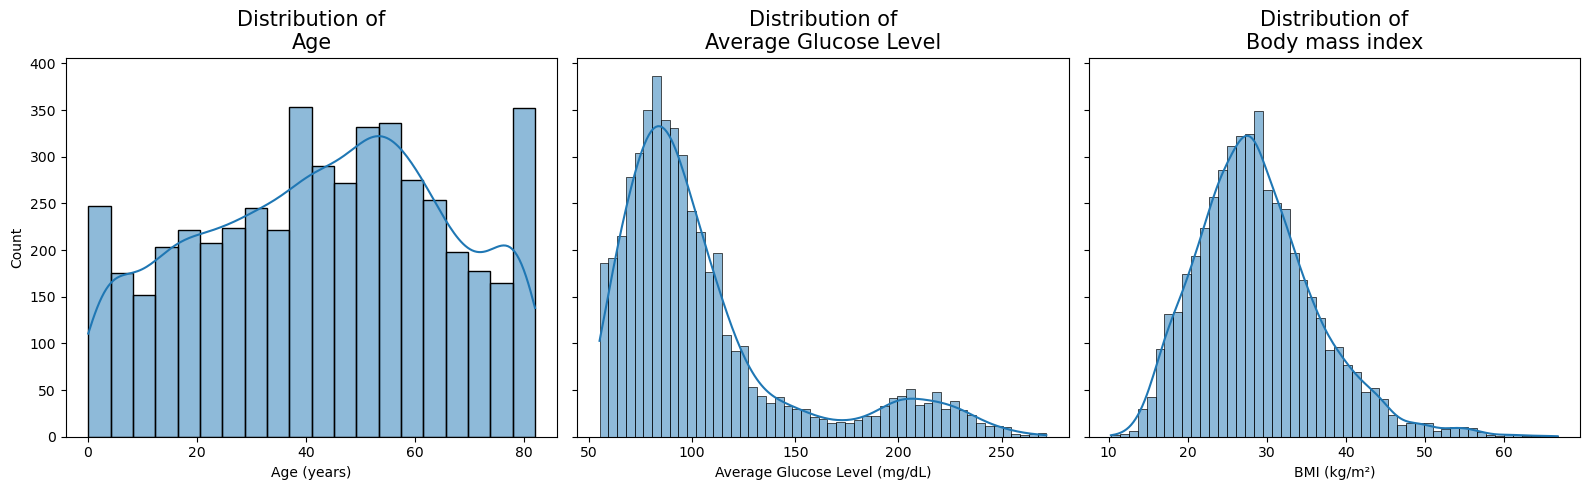

In [21]:
#plot the distributions of bmi, average glucose level and age
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()

fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(16, 5))
titles = {
    "age": "Age",
    "bmi": "Body mass index",
    "avg_glucose_level": "Average Glucose Level",
}
xlabels = {
    "age": "Age (years)",
    "bmi": "BMI (kg/m²)",
    "avg_glucose_level": "Average Glucose Level (mg/dL)",
}

for i, ax in enumerate(axs.flatten()):
    if i < len(numeric_columns):
        column = numeric_columns[i]
        sns.histplot(data=data, x=column, kde=True, ax=ax)
        ax.set_title(f"Distribution of\n{titles[column]}", fontsize=15)
        ax.set_xlabel(xlabels[column], fontsize=10)
        if i != 0:
            ax.set_ylabel(None)
    else:
        fig.delaxes(ax)

fig.tight_layout()
plt.show()

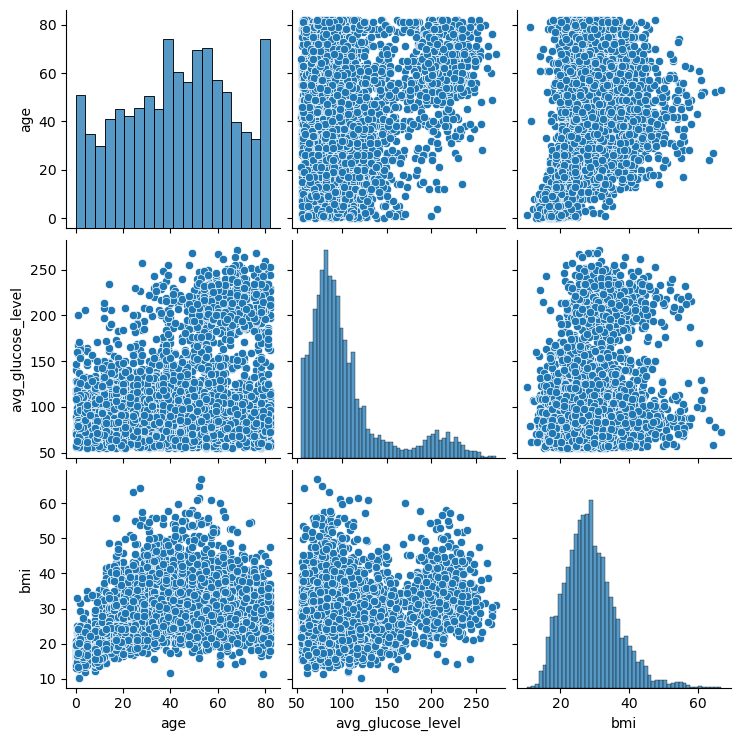

In [ ]:
#correlation between variables
vars = data.select_dtypes(include=[np.number]).columns.tolist()

plot = sns.pairplot(data=data, vars=vars)


In [23]:
#quantify correlation between variable pairs
for comb in combinations(vars, 2):
    print(f" {comb[0]} - {comb[1]}")
    print(f"\tSpearman Rank Correlation {sts.spearmanr(data[comb[0]], data[comb[1]]).statistic: .3f}, p-value {sts.spearmanr(data[comb[0]], data[comb[1]]).pvalue: .3f}")
    print(f"\tPearson Rank Correlation  {sts.pearsonr(data[comb[0]], data[comb[1]]).statistic: .3f}, p-value {sts.pearsonr(data[comb[0]], data[comb[1]]).pvalue: .3f}")
# Spearman:     is the Pearson’s correlation coefficient applied to the rank of the data, no absolute values but only relative ranks 
    #-1: perfect negative correlation (x increases, y decreases) 
    #0: no association (unrelated variables)  
    #+1: perfect positive correlation (x increases, y increases)   
#Pearson:     strength of the linear relationship between two variables (x, y) that come from interval or ratio level without outliers 
    #-1: perfect negative correlation (x increases, y decreases) 
    #0: no association (unrelated variables) 
    #+1: perfect positive correlation (x increases, y increases) 

 age - avg_glucose_level
	Spearman Rank Correlation  0.140, p-value  0.000
	Pearson Rank Correlation   0.236, p-value  0.000
 age - bmi
	Spearman Rank Correlation  0.377, p-value  0.000
	Pearson Rank Correlation   0.345, p-value  0.000
 avg_glucose_level - bmi
	Spearman Rank Correlation  0.116, p-value  0.000
	Pearson Rank Correlation   0.180, p-value  0.000


In [ ]:
#statistical testing


Tutorial 6

Tutorial 7

Tutorial 8

Tutorial 9